# Model Evaluation

This notebook evaluates the trained model to:
- Evaluate its performance on the validation set
- Analyze feature importance
- Visualize prediction accuracy and errors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import json
from pathlib import Path
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load datasets and model info
val_df = pd.read_csv("../models/validation_dataset.csv")
with open("../models/model_info.json", "r") as f:
    model_info = json.load(f)

feature_columns = model_info['feature_names']
X_val = val_df[feature_columns]
y_val = val_df['suitability_score']

print(f"Validation set shape: {val_df.shape}")

Validation set shape: (89871, 15)


## Load and Evaluate the Best Model

In [2]:
models_dir = Path("../models")
best_model_path = models_dir / "crop_suitability_model.pkl"
best_model = joblib.load(best_model_path)
best_model_name = model_info.get('model_type', 'Unknown')

y_pred = best_model.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Best Model: {best_model_name}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")

Best Model: XGBoost
RMSE: 10.92
MAE: 6.30
R²: 0.7875


## Best Model Analysis

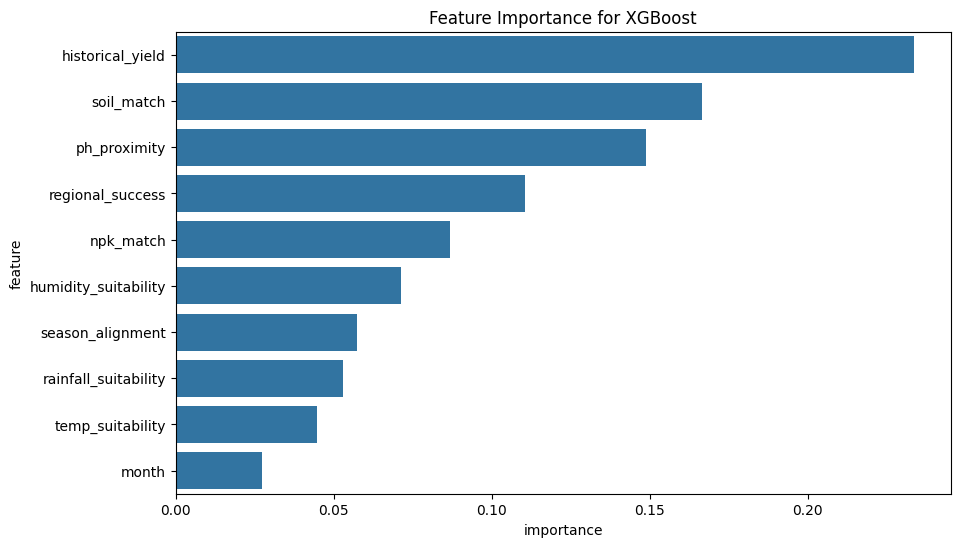

In [3]:
# Feature Importance of the Best Model
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': feature_columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title(f'Feature Importance for {best_model_name}')
    plt.savefig("feature_importance.png")
    plt.show()

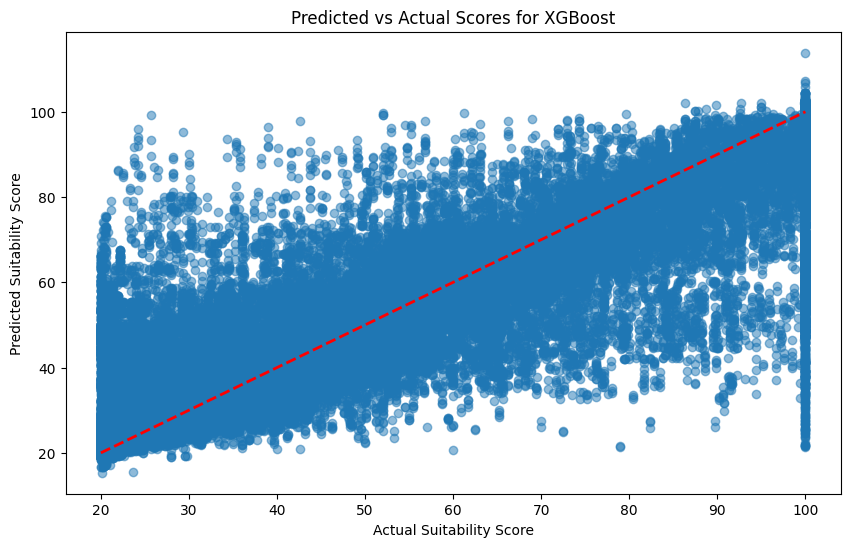

In [4]:
# Prediction vs Actual Plot for the Best Model
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('Actual Suitability Score')
plt.ylabel('Predicted Suitability Score')
plt.title(f'Predicted vs Actual Scores for {best_model_name}')
plt.savefig("predicted_vs_actual.png")
plt.show()

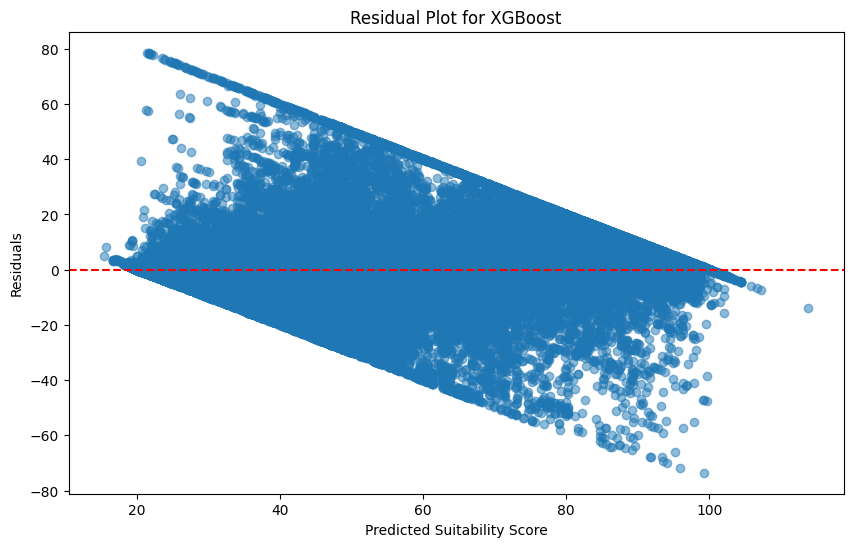

In [5]:
# Residual Plot for the Best Model
residuals = y_val - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Suitability Score')
plt.ylabel('Residuals')
plt.title(f'Residual Plot for {best_model_name}')
plt.show()